## Mexico's COVID19 Data description and Analisys

> 
> 
<font size=5 color='black'>Data comes from:</font>
<a  href="https://coronavirus.gob.mx/datos/#DownZCSV"><font size=5 color='blue'>Updated Every 24hrs</font></a>
> 
>
<div class="container" style="position: relative;text-align: center,border:2px solid red;
  color: white;">
  <img align="left" src="https://i.imgur.com/9hAvQVf.png">
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading Data

In [ ]:
# Pacient data contains detail information aout every subject in the database, age, sex, and some illness history
pacient_data = pd.read_csv('200513COVID19MEXICO.csv', encoding='ANSI')
# Confirmed is the number of comfirmed cases each day
confirmed = pd.read_csv('Casos_Diarios_Estado_Nacional_Confirmados_20200513.csv', encoding='ANSI')
# Suspicious is the number of suspicious cases each day
suspicious = pd.read_csv('Casos_Diarios_Estado_Nacional_Sospechosos_20200513.csv', encoding='ANSI')
# Negatives is the number of negative test cases each day
negatives = pd.read_csv('Casos_Diarios_Estado_Nacional_Negativos_20200513.csv', encoding='ANSI')
# Deaths is the number of deceased cases each day
deaths = pd.read_csv('Casos_Diarios_Estado_Nacional_Defunciones_20200513.csv', encoding='ANSI')
# State_names is an array with the names of each state
state_names = deaths.nombre.values

In [ ]:
# Data example
confirmed.head()

## State Names

In [ ]:
state_names

# 1.- Descriptive data

## Functions to get discrete or cummulative data from any particular state

In [ ]:
# Name is the name of the state
# raw_data is the type of data: deaths, confirmed, negatives or suspicious

def get_discrete(name,raw_data):
    return raw_data.loc[raw_data['nombre'] == name]

def get_cummulative(name,raw_data):
    cummulative = []
    raw = raw_data.loc[raw_data['nombre'] == name]
    
    for i in raw.values[0][3:]:
        if len(cummulative) == 0:
            cummulative.append(i)
        else:
            cummulative.append(i+cummulative[-1])
    return cummulative

In [ ]:
discrete_cdmx_deaths = get_discrete('DISTRITO FEDERAL',deaths)
cummulative_cdmx_deaths = get_cummulative('DISTRITO FEDERAL',deaths)

## get_discrete() gives a pd.Series with the dates for columns

In [ ]:
discrete_cdmx_deaths.head()

## get_cummulative() gives an array of the cummulative record 

In [ ]:
cummulative_cdmx_deaths[:10]

## Function to get several states sorted from max to min.

In [ ]:
# It returns an array with data for each state and an array of names
# [data1,data2,data3...],['name1','name2','name3'...] = get_max_to_min()
# It is used for plotting all data at once

# N is the number of states returned, if None will return all states
# Could ask for discrete or cummulative if discrete parameter == False
# National data is naturally much more higher that any particular state, by default is ommited
# To include it set the parameter include_national to True

def get_max_to_min(raw_data,n=None,discrete=True,include_national=False):
    
    
    dic = {}
    if include_national:
        names = raw_data.nombre
    else:
        names = [x for x in raw_data.nombre if x != 'Nacional']

    for i in names:
        
        if discrete:
            result = get_discrete(i,raw_data).values[0][3:].sum()
        else:
            result = get_cummulative(i,raw_data)[-1]
        
        if result in dic.keys():
            dic[result+0.1] = i
        else:
            dic[result] = i

    dic_sort = sorted(dic.keys(),reverse=True)
    sorted_names = [dic[x] for x in dic_sort][:n]
    
    if discrete:
        return [get_discrete(x,raw_data) for x in sorted_names], sorted_names
    else:
        return [get_cummulative(x,raw_data) for x in sorted_names], sorted_names


## Function to plot discrete data

In [ ]:
# Data should be an array (even if there is only one state) with discrete data from get_discrete()
# Names also should be an array of strings
# You can choose the colors of each state by passing an array: ['r','b','y'...]
# Or passing a string: 'rgy' if each of the colors are one letter.
# If colors = None or is not passed, colors will be a cycle from 'b', 'g', 'r', 'c', 'm' and 'y'
# Size of the ploot coul be modified by: plt.rcParams["figure.figsize"] = (15,6) inside the function

def plot_discrete(data, names ='no_name',colors=None, title=None):
    plt.close('all')
    plt.style.use('seaborn-whitegrid')

    plt.rcParams["figure.figsize"] = (15,6)
    
    if colors == None:
            colors ='bgrcmy'* int(np.ceil(len(data)/6))
    
    for ind, i in enumerate(data):
        
        plt.bar(i.columns[3:],i.values[0][3:], label = names[ind],color = colors[ind],alpha = 0.5)
       
    plt.title(title, fontsize=14)
    plt.legend(loc='upper left')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
plot_discrete([get_discrete('DISTRITO FEDERAL',deaths),
               get_discrete('MEXICO',deaths)],
               names =['CDMX','Estado de Mexico'],
               colors=['r','b'],
               title='Deaths by day Mexico City and Mexico State')

# Funtion to plot cummulative data

In [ ]:
# Same Instructions of the discrete data apply here
# Data and Names should be arrays and etc...

def plot_cummulative(data, names ='no_name',colors=None, title=None):
    plt.close('all')
    plt.style.use('seaborn-whitegrid')

    plt.rcParams["figure.figsize"] = (15,7)
    
    if len(data[0]) == len(deaths.columns[3:]):
        index = deaths.columns[3:]
    elif len(data[0]) == len(confirmed.columns[3:]):
        index = confirmed.columns[3:]
    elif len(data[0]) == len(suspicious.columns[3:]):
        index = suspicious.columns[3:]
    elif len(data[0]) == len(negatives.columns[3:]):
        index = negatives.columns[3:]
    else:
        index = np.arange(0,len(data[0]))
    
    if colors == None:
        colors ='bgrcmy'* int(np.ceil(len(data)/6))
    
    for ind,i in enumerate(data):
        
        plt.plot(index,i,label=names[ind],color=colors[ind])
        plt.scatter(index[-1],i[-1],color=colors[ind])
        plt.text(index[-1], i[-1],str(int(i[-1])) , fontsize=14 ,color=colors[ind])
        plt.fill_between(index, i, color = colors[ind], alpha = 0.4)
        
    plt.xticks(rotation=90)
    plt.title(title, fontsize=14)
    plt.legend(loc='upper left',fontsize=12)
    plt.show()

In [ ]:
plot_cummulative([get_cummulative('DISTRITO FEDERAL',deaths),
                  get_cummulative('MEXICO',deaths)],
                  names =['CDMX','Estado de Mexico'],
                  colors=['r','b'],
                  title='Deaths by day Mexico City and Mexico State')

# Function to plot all data from max to min

In [ ]:
# Raw_data is the database of origin: deaths, confirmed, etc...
# N is the number of states that will be plotted
# If the Discrete parameter is False then cummulative data will be plotted

def plot_all(raw_data,n=None, discrete=True, title='No title',colors = None):
    
    if discrete:
        data, names = get_max_to_min(raw_data,n=n,discrete=True)
        plot_discrete(data = data,
                      names = names,
                      colors = colors,
                      title = title)
    else:
        data, names = get_max_to_min(raw_data,n=n,discrete=False)
        plot_cummulative(data = data,
                         names = names,
                         colors = colors,
                         title = title)

# Discrete states from max to min incidence

In [ ]:
plot_all(raw_data = deaths,
         n=4,
         colors= ['b','g','black','r'],
         discrete=True,
         title='Mexico States with more Deaths by Day')

# Cummulative states from max to min incidence

In [ ]:
plot_all(raw_data = deaths,
         n=4,
         discrete=False,
         colors= ['b','g','black','r'],
         title='Mexico States with more Deaths by Day')

## Pacients Data

In [1]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np

In [3]:
from vega_datasets import data as vds

In [6]:
import cartopy.io.shapereader as shpreader

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

C:\Users\jupol\AppData\Local\Continuum\anaconda3\envs\tf2\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


In [7]:
reader = shpreader.Reader(shpfilename)
countries = reader.records()
country = next(countries)

In [9]:
print (sorted(country.attributes.keys()))

['ABBREV', 'ABBREV_LEN', 'ADM0_A3', 'ADM0_A3_IS', 'ADM0_A3_UN', 'ADM0_A3_US', 'ADM0_A3_WB', 'ADM0_DIF', 'ADMIN', 'BRK_A3', 'BRK_DIFF', 'BRK_GROUP', 'BRK_NAME', 'CONTINENT', 'ECONOMY', 'FIPS_10_', 'FORMAL_EN', 'FORMAL_FR', 'GDP_MD_EST', 'GDP_YEAR', 'GEOUNIT', 'GEOU_DIF', 'GU_A3', 'HOMEPART', 'INCOME_GRP', 'ISO_A2', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'LABELRANK', 'LASTCENSUS', 'LEVEL', 'LONG_LEN', 'MAPCOLOR13', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAX_LABEL', 'MIN_LABEL', 'MIN_ZOOM', 'NAME', 'NAME_ALT', 'NAME_AR', 'NAME_BN', 'NAME_CIAWF', 'NAME_DE', 'NAME_EL', 'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_HI', 'NAME_HU', 'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_LEN', 'NAME_LONG', 'NAME_NL', 'NAME_PL', 'NAME_PT', 'NAME_RU', 'NAME_SORT', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH', 'NE_ID', 'NOTE_ADM0', 'NOTE_BRK', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'POSTAL', 'REGION_UN', 'REGION_WB', 'SOVEREIGNT', 'SOV_A3', 'SUBREGION', 'SUBUNIT', 'SU_A3', 'SU_DIF', 'TINY', 'TYPE', 'UN_A3', 'WB_A2', 'WB

In [ ]:
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

# Create a Stamen terrain background instance
stamen_terrain = cimgt.Stamen('terrain-background')
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Set range of map, stipulate zoom level
ax.set_extent([-130, -60, 20, 55], crs=ccrs.Geodetic())
ax.add_image(stamen_terrain, 12)

# Add city borders - not working
filename = r'./gadm/gadm36_MEX_1.shp' # from https://earthworks.stanford.edu/catalog/stanford-vj593xs7263
shape_feature = ShapelyFeature(Reader(filename).geometries(), ccrs.PlateCarree(), edgecolor='black')
ax.add_feature(shape_feature, zorder = 1)
plt.show()

<urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond><urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond><urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond><urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond><urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or 

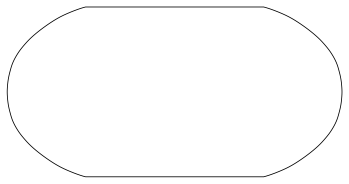

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

fname = './gadm/gadm36_MEX_1.shp'

ax = plt.axes(projection=ccrs.Robinson())
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none')
ax.add_feature(shape_feature)
plt.show()

In [ ]:

airports = vds.airports()
airports = airports.iloc[:10]
airports.head()
for i in airports.itertuples():
    m6.scatter(i.longitude, i.latitude, color='blue', transform=ccrs.PlateCarree())
    plt.text(i.longitude, i.latitude, i.name)
